In [133]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## 1. In markdown, describe KNN in your own words.


K-nearest neighbors (kNN) is a supervised learning algorithm. Its based on a model of influence determined by finding the distance between a specific variable and all the variables in the selected data. k determines how large the the spear of influence is (closest points). Data points within k are deemed to be part of that class and can be used  to predict the target variable.

## 2. Using the KNN example from class, write a function that finds the optimal value for k.
You should iterate over a range of values and return the k and the score when the
accuracy score is maximized. Be sure to only use odd values.

In a range of 40 k(39); k=0.7619 is optimal. In the data set with range over 535; len(y_train),  it is over fitted and predictabilty becomes flawed. k value drops around k(220)

In [13]:
X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardization-transforming values so mean is 0 and SD is 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#knn=KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train, y_train)
#y_predict = knn.predict(X_test)
#print(y_predict)

In [161]:
from sklearn.metrics import accuracy_score  #.score from LinearRegression can also be utilized

k_scores=[] #empty list for k values array

for k in range(1, 40, 2): # function to iterate over all the odd values in a range of 40 from the taining data 
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    
    #print "k"...k value... accuracy score rounded tp 4 decimal places 
    k_scores.append("k({})={}".format(k, round(accuracy_score(y_test, y_predict), 4)))

print(k_scores)  #print array

['k(1)=0.6277', 'k(3)=0.71', 'k(5)=0.7186', 'k(7)=0.7056', 'k(9)=0.71', 'k(11)=0.7143', 'k(13)=0.7143', 'k(15)=0.7229', 'k(17)=0.71', 'k(19)=0.7359', 'k(21)=0.7403', 'k(23)=0.7403', 'k(25)=0.7446', 'k(27)=0.7359', 'k(29)=0.7273', 'k(31)=0.7316', 'k(33)=0.7359', 'k(35)=0.7403', 'k(37)=0.7576', 'k(39)=0.7619']


In [141]:
k_scores=[] #empty list for k value array

for k in range(1, len(y_train), 2): # len(y_train) - iterating over all the values in the taining data 
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    k_scores.append("k({})={}".format(k, round(accuracy_score(y_test, y_predict), 4))) #print "k" then the k value followed by the accuracy score
print(k_scores)  #print array of k values

#stops pred

['k(1)=0.6277', 'k(3)=0.71', 'k(5)=0.7186', 'k(7)=0.7056', 'k(9)=0.71', 'k(11)=0.7143', 'k(13)=0.7143', 'k(15)=0.7229', 'k(17)=0.71', 'k(19)=0.7359', 'k(21)=0.7403', 'k(23)=0.7403', 'k(25)=0.7446', 'k(27)=0.7359', 'k(29)=0.7273', 'k(31)=0.7316', 'k(33)=0.7359', 'k(35)=0.7403', 'k(37)=0.7576', 'k(39)=0.7619', 'k(41)=0.7403', 'k(43)=0.7446', 'k(45)=0.7446', 'k(47)=0.7316', 'k(49)=0.7273', 'k(51)=0.7229', 'k(53)=0.7316', 'k(55)=0.7316', 'k(57)=0.7359', 'k(59)=0.7446', 'k(61)=0.7446', 'k(63)=0.7446', 'k(65)=0.7446', 'k(67)=0.7359', 'k(69)=0.7403', 'k(71)=0.7403', 'k(73)=0.7316', 'k(75)=0.7273', 'k(77)=0.7273', 'k(79)=0.7273', 'k(81)=0.7273', 'k(83)=0.7359', 'k(85)=0.7359', 'k(87)=0.7359', 'k(89)=0.7359', 'k(91)=0.7403', 'k(93)=0.7446', 'k(95)=0.7489', 'k(97)=0.7403', 'k(99)=0.7316', 'k(101)=0.7359', 'k(103)=0.7273', 'k(105)=0.7316', 'k(107)=0.7316', 'k(109)=0.7403', 'k(111)=0.7403', 'k(113)=0.7403', 'k(115)=0.7359', 'k(117)=0.7316', 'k(119)=0.7186', 'k(121)=0.7229', 'k(123)=0.7229', 'k(125

In [162]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()
diabetes_pred_df['Predicted_Outcome'] = y_predict.tolist()

diabetes_pred_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Actual_Outcome,Predicted_Outcome
0,0.523387,-0.739446,-0.444600,0.720042,0.956067,0.232733,-0.152282,0.786051,0,0
1,-0.590921,-0.289349,0.329998,0.661122,-0.691043,0.433777,-1.077306,-1.059081,0,0
2,-0.590921,-0.417948,-0.171213,-1.224301,-0.691043,-0.145702,-1.044503,-1.059081,0,0
3,1.080541,-0.450098,0.557822,-1.224301,-0.691043,-0.878919,1.245094,0.031224,0,0
4,0.801964,0.482248,1.013468,-1.224301,-0.691043,-0.252136,-0.873932,1.373138,0,0
5,0.523387,-0.578697,0.193304,0.661122,0.956067,0.670299,-0.499986,1.792486,0,0
6,-0.869498,-1.607492,-0.900247,-0.163750,-0.032199,-1.375615,-0.503266,-0.975211,0,0
7,-1.148075,-0.128599,-3.087349,-1.224301,-0.691043,0.209081,1.494391,0.869920,0,0
8,-0.033767,1.060945,0.193304,0.484364,0.401251,-0.086571,-0.454063,0.282833,0,0
9,0.244810,0.835896,0.466692,-1.224301,-0.691043,0.197255,-0.847690,2.631182,0,1


In [76]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predict)

array([[137,  14],
       [ 41,  39]], dtype=int64)

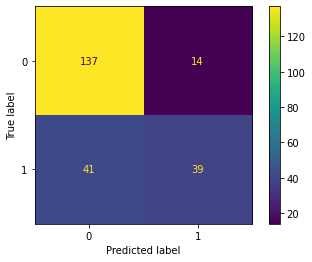

In [160]:
plot_confusion_matrix(knn, X_test, y_test)

In [59]:
(137+39)/(137+39+41+14)

0.7619047619047619

## 3. How did the panel influence your thoughts about working in tech, specifically work in thedata realm?
Discuss with your group and summarize your thoughts in under 250 words.

The panel affirmed that a transition to tech from any backgroud is possible. The emphi that the skill I already have add value and can give leverage in obtaining a position.  For me the panel reassurded that even the most seasoned or educated person is continously learning and makes mistakes. Their emphasis on team work and gaining an understanding of the buisness and the intention behind the usage of the data made the idea of working in the data realm feel more managable/approachable. Also gaining an understanding entry level anlyst vs data scientist vs data engineer was insightful.  Specifically, hearing how Michelle started with a similar backgroud to me (molecular bio) and was able to succeed in tech was extremly encouraging.  